# Domain Poling: numerical considerations for Quasi Phase Matching (QPM) on a $\chi^{(2)}$ system

In [1]:
cd ../../src/NonlinearOptics/

/home/fpresutti/src/NonlinearOptics


In [2]:
import numpy as np
from numpy.fft import fft, ifft, fftshift, ifftshift

from nonlinearmedium import Chi2SFG

from poling import *

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [9, 6]

Compare simulations with different step sizes, for 2 configurations:

a) Poled (flipping the sign of the $\chi^{(2)}$ nonlinearity in each domain)

b) Rotating frame ($\Delta k \rightarrow 0$, $d \rightarrow d_\text{eff} = 2 d / \pi$)

For simplicity simulate with no dispersion.

In [4]:
zSteps = [50, 100, 200, 500, 1000, 5000]
zStepsPM = [50, 100, 200]
nt = 2**8

In [5]:
baseParams = {
    "relativeLength": 3,
    "nlLength": 1,
    "nlLengthOrig": 1,
    "beta2": 0,
    "beta2s": 0,
    "beta2o": 0,
    "customPump": np.ones(nt),
    "tPrecision": nt,
}

Define a phase mismatch and construct a domain poling pattern

In [6]:
diffBeta0 = 150

In [7]:
polPeriod = 2 * np.pi / abs(diffBeta0)
nDomains  = 2 * baseParams["relativeLength"] / polPeriod
poling = np.ones(int(nDomains) + int(np.ceil(nDomains % 1)))
poling[-1] = nDomains % 1

Prepare some simulations
1. in the rotating frame, with no poling, with varying step size in space
2. with explicit poling, with varying step size in space

In [8]:
tests = [None] * (len(zStepsPM) + len(zSteps))

for i, z in enumerate(zStepsPM):
    tests[i] = Chi2SFG(**{**baseParams, "zPrecision": z,
                          "relativeLength": baseParams["relativeLength"] / (np.pi / 2)})

for i, z in enumerate(zSteps):
    tests[i+len(zStepsPM)] = Chi2SFG(**{**baseParams, "zPrecision": z,
                                        "diffBeta0": diffBeta0, "poling": poling})

Plot the effective poling profile for each simulation, with different step sizes.
Note how well the square waves are represented are for each step size.

<IPython.core.display.Javascript object>


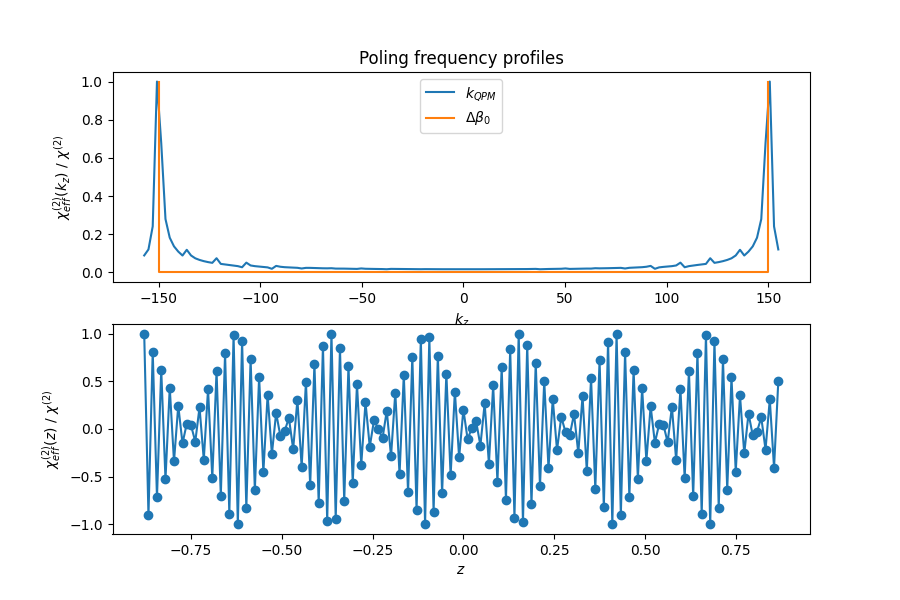

<IPython.core.display.Javascript object>


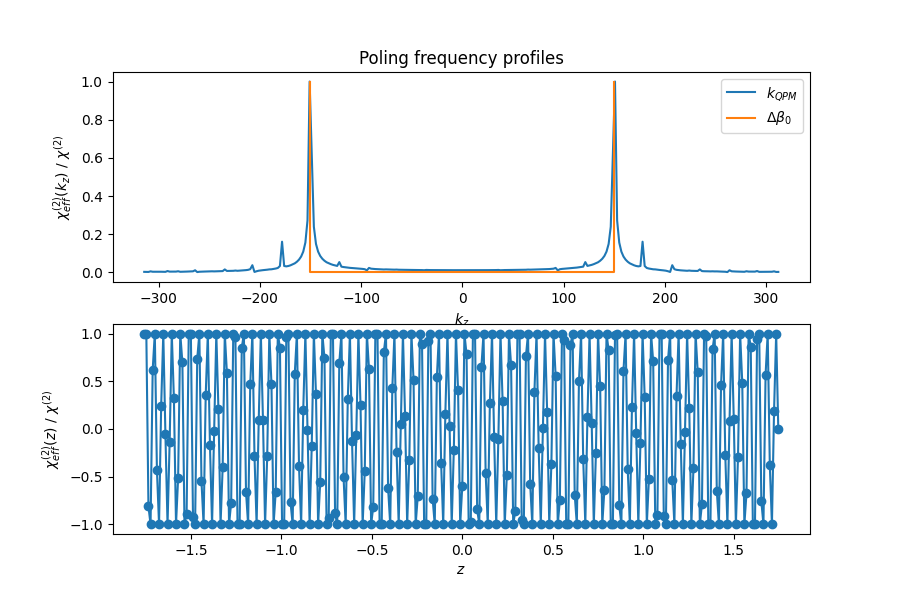

<IPython.core.display.Javascript object>


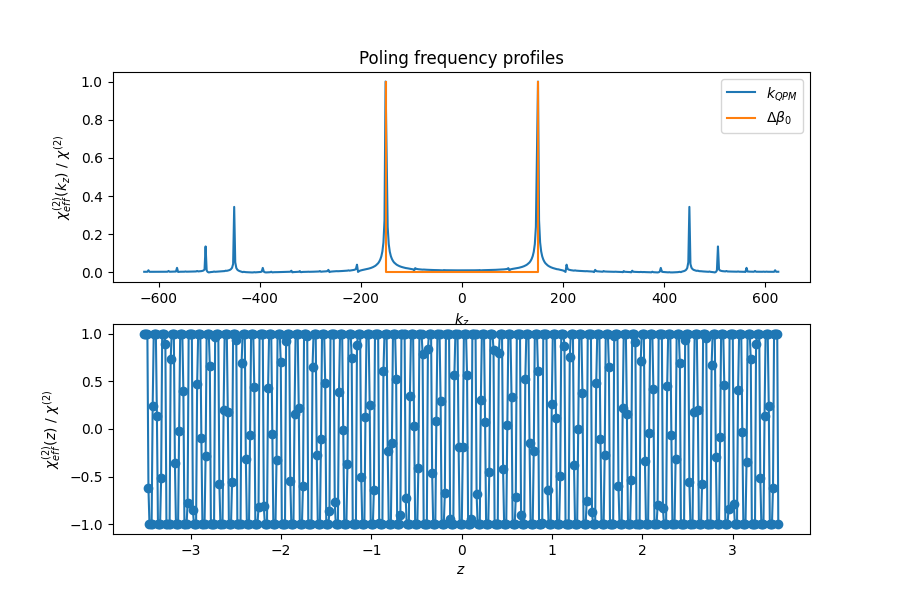

<IPython.core.display.Javascript object>


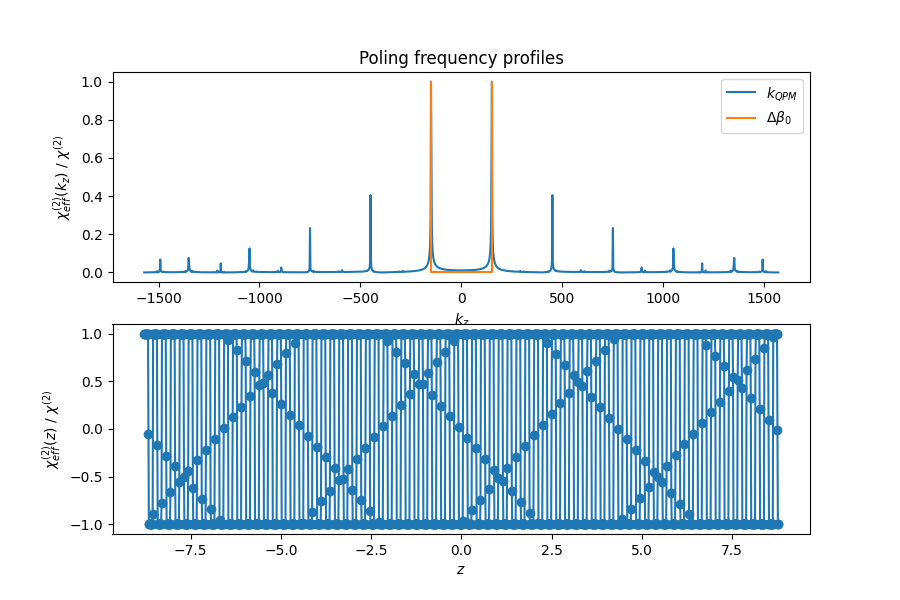

<IPython.core.display.Javascript object>


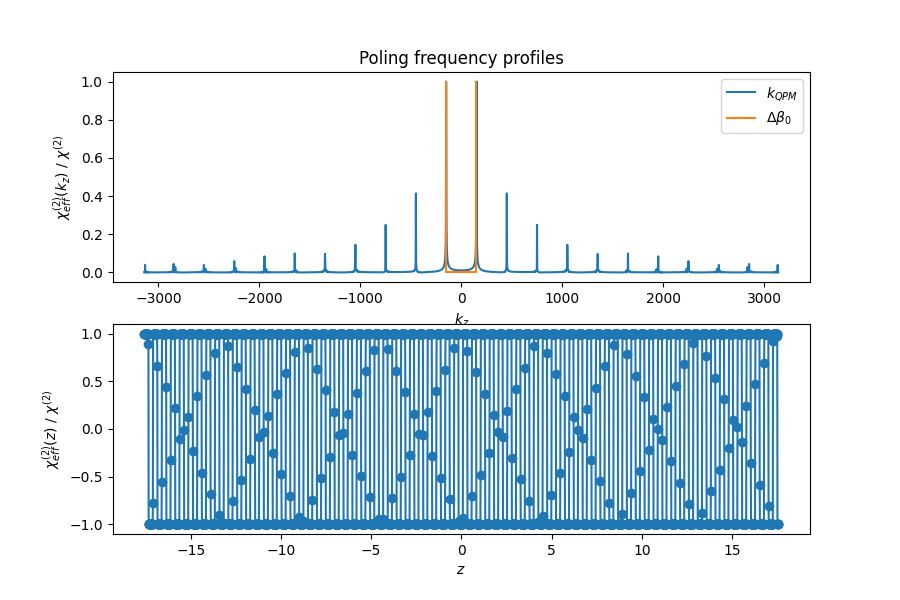

<IPython.core.display.Javascript object>


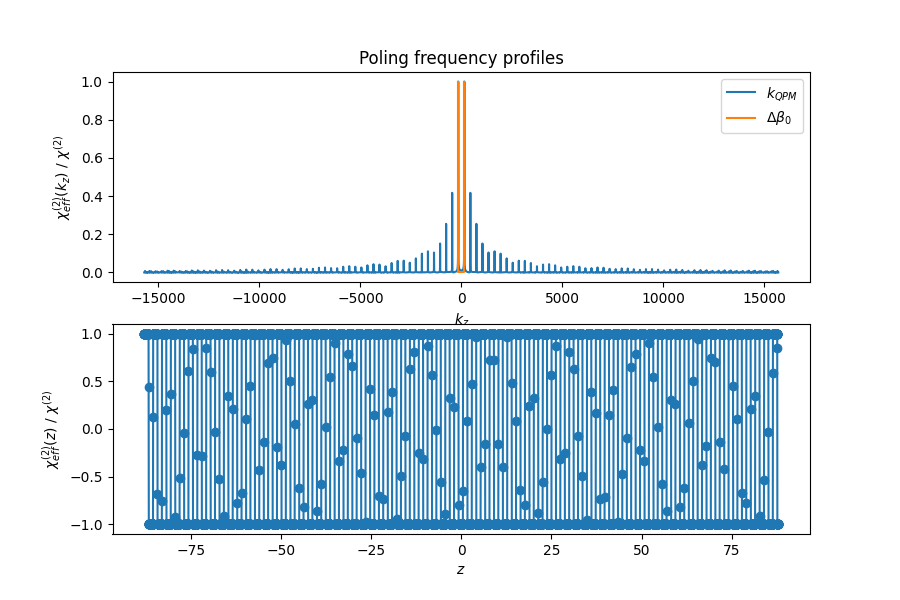

In [9]:
for crystal in tests[len(zStepsPM):]:
  fig = plt.figure()
  ax = fig.add_subplot(2, 1, 1)

  spatialFreq = np.abs(fftshift(fft(crystal.poling)))
  plt.plot(2 * np.pi / baseParams["relativeLength"] * np.arange(-crystal.signalTime.shape[0] / 2, crystal.signalTime.shape[0] / 2),
           spatialFreq / np.max(spatialFreq), label=r"$k_{QPM}$")
  plt.plot([-diffBeta0, -diffBeta0, diffBeta0, diffBeta0],
           [1, 0, 0, 1], label=r"$\Delta\beta_0$")
  plt.xlabel(r"$k_z$")
  plt.ylabel(r"$\chi^{(2)}_{eff}(k_z) ~/~ \chi^{(2)}$")
  plt.title("Poling frequency profiles")
  plt.legend()

  ax = fig.add_subplot(2, 1, 2)
  plt.plot(baseParams["relativeLength"] * np.arange(-crystal.signalTime.shape[0] / 2, crystal.signalTime.shape[0] / 2) / nt,
           crystal.poling, "-o")
  plt.xlabel(r"$z$")
  plt.ylabel(r"$\chi^{(2)}_{eff}(z) ~/~ \chi^{(2)}$");

Compare the results of a simulation of an SFG process

In [10]:
for test in tests:
  test.runPumpSimulation()
  test.runSignalSimulation(np.exp(-test.tau**2), inTimeDomain=True)

<IPython.core.display.Javascript object>


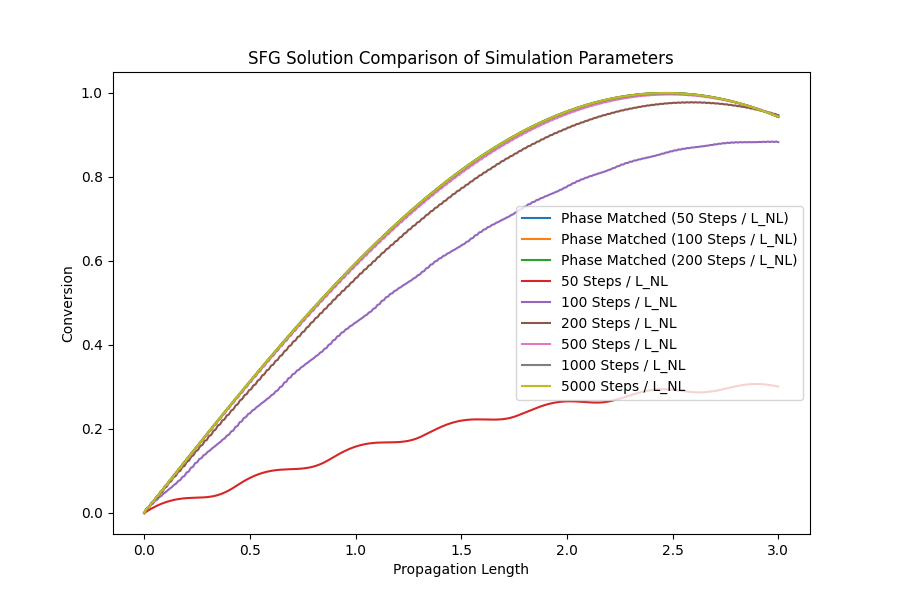

In [11]:
fig = plt.figure()

for z, test in zip(zSteps, tests[:len(zStepsPM)]):
    plt.plot(np.linspace(0, baseParams["relativeLength"], test.signalTime.shape[0]),
         np.abs(test.signalTimes(1)[:, 0]), label="Phase Matched ({:d} Steps / L_NL)".format(z))

for z, test in zip(zSteps, tests[len(zStepsPM):]):
  plt.plot(np.linspace(0, baseParams["relativeLength"], test.signalTime.shape[0]),
           np.abs(test.signalTimes(1)[:, 0]), label="{:d} Steps / L_NL".format(z))

plt.xlabel("Propagation Length")
plt.ylabel("Conversion")
plt.title("SFG Solution Convergence Comparison")

plt.legend();

In [12]:
print("Number of domains in the simulation:", poling.size)

Number of domains in the simulation: 144


The discontinuity and high frequency of the domain poling structure significantly increase the resolution needed to obtain the correct solution compared to the rotating frame simulation.